In [1]:
import pandas as pd
import os
import numpy as np 
from tqdm import tqdm
import shutil
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

## Location of Dataset

In [2]:
#Take data folder location as input
src_dir = input("Enter location to Data Folder : ")

if os.path.exists(src_dir):
    dir_ = os.listdir(src_dir)
    print(f"Data Folder : {dir_}")

Enter location to Data Folder : ../../data
Data Folder : ['.DS_Store', 'train.txt', 'hindi_vocab.txt', 'HindiSeg', 'Readme.txt', 'test.txt', 'val.txt', 'lexicon.txt']


## Get data as frame

In [3]:
#Find test.txt, train.txt, val.txt and load them as pandas frame

train_index = dir_.index('train.txt')
test_index = dir_.index('test.txt')
val_index = dir_.index('val.txt')

#Location
train_txt = os.path.join(src_dir, dir_[train_index])
test_txt = os.path.join(src_dir, dir_[test_index])
val_txt = os.path.join(src_dir, dir_[val_index])
# print(val_txt_loc)

train_df = pd.read_csv(train_txt, sep=" ", header=None, names=["files", "tokens"])
test_df = pd.read_csv(test_txt, sep=" ", header=None, names=["files", "tokens"])
val_df = pd.read_csv(val_txt, sep=" ", header=None, names=["files", "tokens"])

In [4]:
# train_df.sort_values("files", inplace=True)
# train_df.sort_values("files")
train_df.head ()

,files,tokens
0,HindiSeg/train/8/251/21.jpg,केंद्रों
1,HindiSeg/train/10/207/8.jpg,पॉवर
2,HindiSeg/train/10/31/19.jpg,तरक्की
3,HindiSeg/train/5/246/23.jpg,मजा
4,HindiSeg/train/8/266/25.jpg,मांजने


## Make data set

## Text Localization

In [7]:
def textLocalization(img):
    
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
#     print(contours)
    # Create a blank image with the same dimensions as the input image
    #blank_image = np.zeros(img.shape, dtype=np.uint8)

    # Draw contours on the blank image
    #contour_image = cv.drawContours(blank_image, contours, -1, (255, 255, 255), 2)

#     min_area = 100
#     max_aspect_ratio = 10
    
    
    img_copy = img.copy()
    
#     filtered_contours = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        rect = cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cropped = img_copy[y:y + h, x:x + w]
#         area = cv.contourArea(contour)
#         aspect_ratio = float(w) / h
#         print(f"Contour {i+1}:")
#         print(f"Bounding box: x={x}, y={y}, w={w}, h={h}")
#         print(f"Area: {area}")
#         print(f"Aspect ratio: {aspect_ratio}\n")

#         if min_area < w * h and aspect_ratio < max_aspect_ratio:
#             filtered_contours.append(contour)

#     original_image_with_boxes = img.copy()
#     for contour in filtered_contours:
#         x, y, w, h = cv.boundingRect(contour)
#         cv.rectangle(original_image_with_boxes, (x, y), (x + w, y + h), (255, 255, 255), 2)
        

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(rect, cmap="gray")
    plt.axis("off")
    plt.show()

In [527]:
# def textLocalization(img, min_area=100, max_aspect_ratio=10):
#     contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
#     img_copy = img.copy()
    
#     cropped_regions = []

#     for contour in contours:
#         x, y, w, h = cv.boundingRect(contour)
#         aspect_ratio = float(w) / h
        
#         if min_area < w * h and aspect_ratio < max_aspect_ratio:
#             cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
#             cropped = img[y:y + h, x:x + w]
#             cropped_regions.append(cropped)
    
#     return cropped_regions


In [707]:
# def textLocalization(img, min_area=100, max_aspect_ratio=2):
#     # Find connected components with statistics
#     _, labels, stats, _ = cv.connectedComponentsWithStats(img, connectivity=8)

#     cropped_regions = []

#     # Iterate through the connected components (skipping the background label)
#     for i in range(1, len(stats)):
#         x, y, w, h, area = stats[i]

#         # Calculate the aspect ratio
#         aspect_ratio = float(w) / h

#         # Filter the components based on the area and aspect ratio
#         if min_area < area and aspect_ratio < max_aspect_ratio:
#             cropped = img[y:y + h, x:x + w]
#             cropped_regions.append(cropped)

#     return cropped_regions

In [6]:
slice_df = train_df.loc[0:100, "files"]
img_locs = list(slice_df)

img_locs = [os.path.join(src_dir, loc) for loc in img_locs]

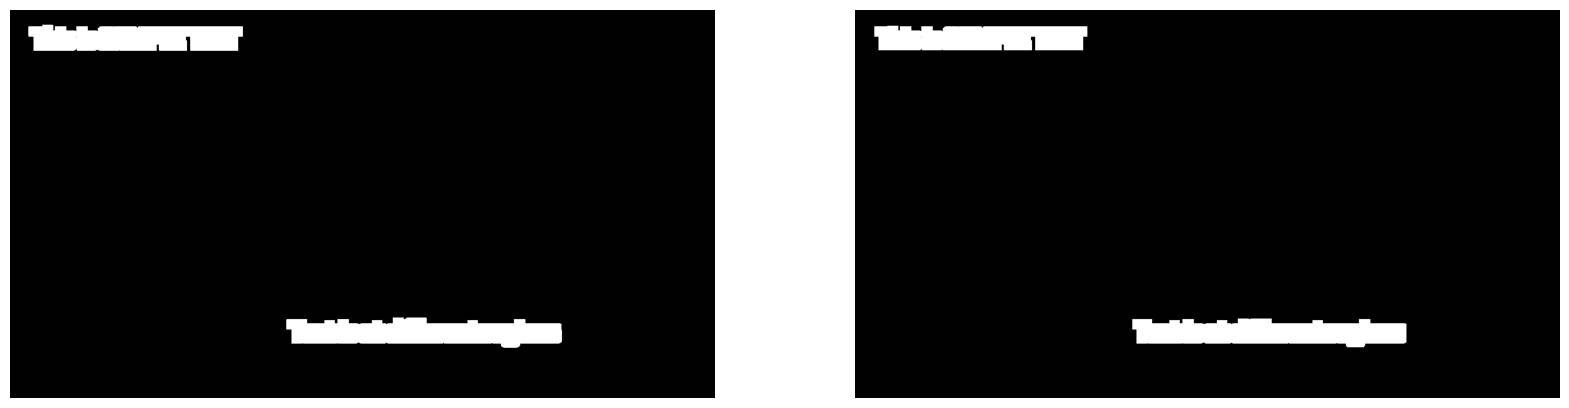

In [8]:
grey_img = cv.imread("/Users/ltc/Desktop/sample.jpg", cv.IMREAD_GRAYSCALE)
ret, thresh1 = cv.threshold(grey_img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)

rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv.dilate(thresh1, rect_kernel, iterations = 1)

# img_gen_2 = imagePre(["/Users/ltc/Desktop/sample.jpg"])
# unskewed_img = next(img_gen_2)

textLocalization(dilation)

# plt.figure(figsize=(8,6))
# plt.imshow(regions[0], cmap="gray")
# plt.axis("off")